## Import Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

df = pd.read_csv("iris-2.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Data Analysis

### Part A

In [3]:
classes = ["All"] + list(df["species"].unique())
features = df.columns[:-1]
feature_colors = [
    "\033[36msepal_length\033[0m",
    "\033[36msepal_width\033[0m",
    "\033[36mpetal_length\033[0m",
    "\033[36mpetal_width\033[0m",
]
stats_test = [
    "\033[32mMinimum\033[0m",
    "\033[32mMaximum\033[0m",
    "\033[32mMean\033[0m",
    "\033[32mTrimmed Mean\033[0m",
    "\033[32mAlpha Trimmed Mean\033[0m",
    "\033[32mStandard Deviation\033[0m",
    "\033[32mSkewness\033[0m",
    "\033[32mKurtosis\033[0m",
]

stats_dict = {}

for c1, i in enumerate(classes):
    stats_matrix = np.zeros((8,4))
    for c2, j in enumerate(features):
        if i != "All":
            feature_class = df.loc[df["species"]==i, j]
        else:
            feature_class = df.loc[:, j]
        stats_matrix[0, c2] = min(feature_class)
        stats_matrix[1, c2] = max(feature_class)
        stats_matrix[2, c2] = feature_class.mean()
        stats_matrix[3, c2] = stats.trim_mean(feature_class, 0.1)
        stats_matrix[4, c2] = stats.mstats.trimmed_mean(feature_class)
        stats_matrix[5, c2] = feature_class.std()
        stats_matrix[6, c2] = stats.skew(feature_class)
        stats_matrix[7, c2] = stats.kurtosis(feature_class)
    df_stats = pd.DataFrame(stats_matrix, columns=feature_colors, index=stats_test)
    stats_dict[i] = df_stats

In [4]:
for key, value in stats_dict.items():
    print(f"\033[1m\033[31m Species: \033[0m{key}")
    print(tabulate(value, headers='keys', tablefmt='rounded_outline'))
    print("")

 Species: All
╭────────────────────┬────────────────┬───────────────┬────────────────┬───────────────╮
│                    │   sepal_length │   sepal_width │   petal_length │   petal_width │
├────────────────────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ Minimum            │       4.3      │      2        │       1        │      0.1      │
│ Maximum            │       7.9      │      4.4      │       6.9      │      2.5      │
│ Mean               │       5.84333  │      3.054    │       3.75867  │      1.19867  │
│ Trimmed Mean       │       5.80833  │      3.03917  │       3.76083  │      1.18417  │
│ Alpha Trimmed Mean │       5.80833  │      3.03917  │       3.76083  │      1.18417  │
│ Standard Deviation │       0.828066 │      0.433594 │       1.76442  │      0.763161 │
│ Skewness           │       0.311753 │      0.330703 │      -0.271712 │     -0.103944 │
│ Kurtosis           │      -0.573568 │      0.241443 │      -1.39536  │     -1.33525  │
╰──────

### Part B

Analysis of the statistic description data...

## 2. Data Processing

### Part A

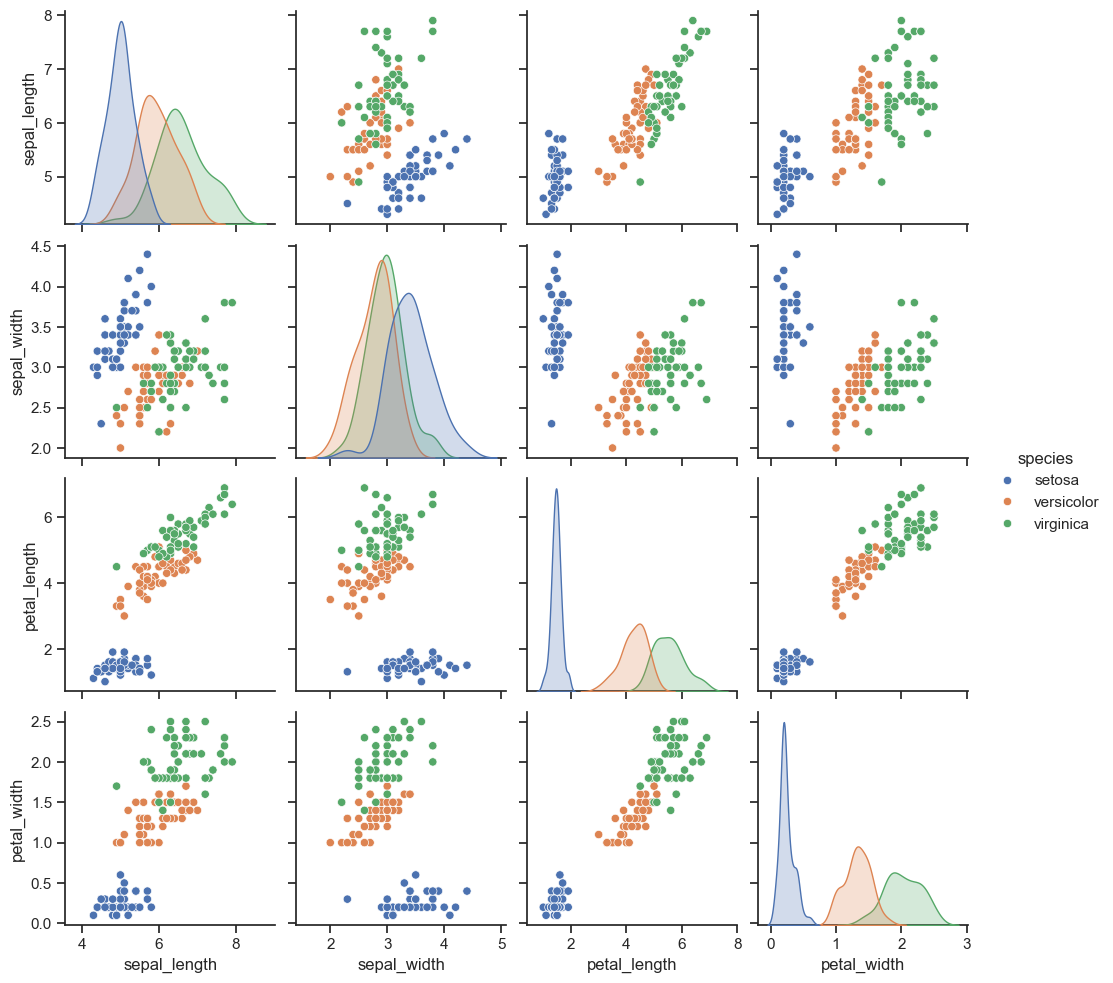

In [5]:
## Type code here for the part 1 ##
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")

### Part B

#### i. Write Pseudo Code

```python
For each feature in the Iris dataset:
    MergeSort(feature_values)

MergeSort(A):
    if the number of elements in A <= 1:
        return A
    else:
        middle = length of A / 2
        left = A[0..middle-1]
        right = A[middle..end]
        
        MergeSort(left)
        MergeSort(right)
        
        Merge(left, right, A)

Merge(left, right, A):
    i = 0, j = 0, k = 0
    
    while i < length of left and j < length of right:
        if left[i] <= right[j]:
            A[k] = left[i]
            i += 1
        else:
            A[k] = right[j]
            j += 1
        k += 1
    
    while i < length of left:
        A[k] = left[i]
        i += 1
        k += 1
    
    while j < length of right:
        A[k] = right[j]
        j += 1
        k += 1
```

#### ii.

The running time of the algorithm I presented called merge sort would be O(n log n) for each feature we want to sort. N would be the number of samples that need to be sorted.

The total running time will be dependent on many different factors such as the constants hidden in the big O notation, the implmentation of the algorithm and the hardware that the sorting algorithm is run on. We can estimate the total running time below in terms of constant values where:
- c is a constant representing the time taken for the basic operations in the merge step.
- d represents the fixed overhead time for setting up the algorithm, which is often negligible.

### T(n)=4⋅c⋅n⋅log(n)+d

#### iii.

In [7]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2  # Finding the mid of the array
        L = arr[:mid]  # Dividing the array elements into 2 halves
        R = arr[mid:]

        merge_sort(L)  # Sorting the first half
        merge_sort(R)  # Sorting the second half

        i = j = k = 0

        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

#### iv.

Based on the graphical analysis in part A, it seems like the combination of petal_width and petal_length can separate the three plant species. There is slight overlap between versicolor and virginica but it is very minimal.

#### v

- A

The features that can separate the plant species are petal_length and petal_width. This separation can be seen in the pairplot from part A.

- B

The metric used to determine the feature that can separate classes would be the class separation metric...

### Part C

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_iris_data = scaler.fit_transform(df.iloc[:,:4])
iris_scaled = pd.DataFrame(data=scaled_iris_data, columns=scaler.get_feature_names_out())
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [9]:
for col in iris_scaled:
    print(f"Feature: {col}")
    print(f"Min Value: {min(iris_scaled[col])}")
    print(f"Max Value: {max(iris_scaled[col])}")
    print("")

Feature: sepal_length
Min Value: 0.0
Max Value: 1.0

Feature: sepal_width
Min Value: 0.0
Max Value: 1.0

Feature: petal_length
Min Value: 0.0
Max Value: 1.0

Feature: petal_width
Min Value: 0.0
Max Value: 1.0



### Part D

#### i. Write Pseudo Code

```python
Class MahalanobisDistance

    Function Initialize(data)
        // Store the data points
        Self.data = data

    Function CalculateCovarianceMatrix()
        // Initialize an empty matrix for covariance, dimensions based on data
        row, col = Dimensions(Self.data)
        covarianceMatrix = ZeroMatrix(col, col)

        // Calculate covariance matrix
        For i from 0 to col-1
            iMean = Mean(Self.data[column=i])
            For j from 0 to col-1
                jMean = Mean(Self.data[column=j])
                // Compute covariance
                covarianceMatrix[i][j] = Sum((Self.data[:,i] - iMean) * (Self.data[:,j] - jMean)) / (row - 1)
        Return covarianceMatrix

    Function CalculateMahalanobisDistance(y)
        // Calculate difference between test point y and mean of data
        diff = y - Mean(Self.data, axis=0)
        covariance = Self.CalculateCovarianceMatrix()
        covarianceInverse = Inverse(covariance)
        // Calculate Mahalanobis distance
        leftMultiplication = Multiply(diff, covarianceInverse)
        mahalanobisDistance = SquareRoot(Multiply(leftMultiplication, Transpose(diff)))
        Return mahalanobisDistance

    Function RemoveOutliers(distances, alpha = 0.05)
        // Determine the threshold for identifying outliers based on the chi-squared distribution
        degreesOfFreedom = NumberOfColumns(Self.data)
        threshold = ChiSquaredCriticalValue(1 - alpha, degreesOfFreedom)
        // Identify outliers
        outliers = distances > SquareRoot(threshold)
        Return outliers
```

#### ii. Run Time Analysis

#### Assumptions:

1. **Data size:** Let's assume the input data is an \(m \times n\) matrix, where \(m\) is the number of observations (data points) and \(n\) is the number of features (variables).
2. **Vectorized operations:** Operations on numpy arrays (mean, sum, etc.) are generally vectorized and thus can be considered to have linear complexity in relation to the number of elements they process, despite the underlying optimizations that may make them faster in practice.

#### Complexity of Each Method:

1. **CalculateCovarianceMatrix:**
    - Calculating the mean of each column: \(O(nm)\), as it requires summing over all \(m\) observations for each of the \(n\) features.
    - Calculating each element of the covariance matrix involves a sum over \(m\) elements, repeated for each pair of features, resulting in a complexity of \(O(n^2m)\).
    - **Total:** \(O(n^2m)\), since this term dominates the \(O(nm)\) term.

2. **CalculateMahalanobisDistance:**
    - Calculating the mean and subtracting it from a vector: \(O(nm)\).
    - Calculating the covariance matrix: \(O(n^2m)\) as derived above.
    - Inverting the covariance matrix: \(O(n^3)\), assuming a general matrix inversion is \(O(n^3)\) where \(n\) is the dimension of the matrix.
    - Matrix-vector multiplications and the final distance calculation: \(O(n^2)\).
    - **Total:** \(O(n^2m + n^3)\), with matrix inversion being the most computationally expensive step for large \(n\).

3. **RemoveOutliers:**
    - Computing distances for all points involves calculating the Mahalanobis distance for each, leading to \(O(m \cdot (n^2m + n^3))\).
    - Comparing distances against a threshold is \(O(m)\).
    - **Total:** \(O(m \cdot (n^2m + n^3))\), dominated by the distance calculations for each point.

#### Total Running Time, \(T(n)\):

When using the class in a typical manner, where one might calculate the Mahalanobis distance for several points and possibly remove outliers, the total running time depends on how these methods are used together. The most computationally intensive operation is the calculation of the covariance matrix and its inversion, which is part of the Mahalanobis distance calculation. If outliers are removed for \(m\) points, the running time is:

\[T(n) = O(m \cdot (n^2m + n^3))\]

#### iii. Code Implementation

In [108]:
from itertools import combinations
import scipy.stats as stats

class mahalanobis_distance:
    
    def __init__(self, data: np.ndarray):
        self.data = data

    # Calculate the covariance matrix using previous assignment code
    def cov_matrix(self):
        row, col = self.data.shape
        cov_mat = np.zeros([col, col])

        for i in range(col):
            i_mean = np.mean(self.data[:,i])
            for j in range(col):
                j_mean = np.mean(self.data[:,j])
                cov_mat[i,j] = np.sum((self.data[:,i] - i_mean) * (self.data[:,j] - j_mean)) / (row - 1)
        return cov_mat

    def mahalanobis(self, y: np.ndarray):
        diff = y - self.data.mean(axis=0)
        covariance = self.cov_matrix()
        cov_inv = np.linalg.inv(covariance)
        left = np.dot(diff, cov_inv)
        mahalanobis_dist = np.sqrt(np.dot(left, diff.T))
        return mahalanobis_dist

    def remove_outliers(self, distances: np.ndarray, alpha: float = 0.05):
        # Degrees of freedom equals the number of features
        degrees_of_freedom = self.data.shape[1]
        # Critical value from chi-squared distribution
        threshold = stats.chi2.ppf((1 - alpha), df=degrees_of_freedom)
        outliers = distances > np.sqrt(threshold)
        return outliers

distance_list = []
for i in df["species"].unique():
    data = df.loc[df["species"]==i,scaler.get_feature_names_out()].values
    outlier = mahalanobis_distance(data=data)
    for row in data:
        distance_list.append(outlier.mahalanobis(row))

# print("50 Distances for Setosa Class")
# print(np.array(distance_list))
outliers_list = ~outlier.remove_outliers(distance_list, alpha=0.05)
print(outliers_list)
data_without_outliers = df.loc[np.array(outliers_list),:]


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


(0.0, 8.0)

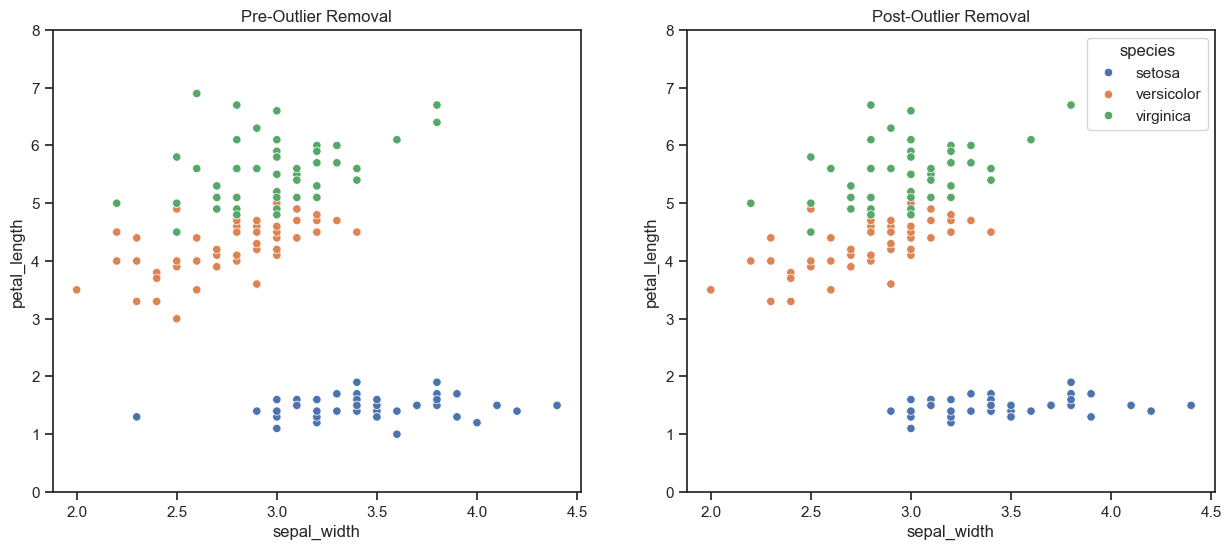

In [109]:
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.scatterplot(df, x="sepal_width", y="petal_length", hue="species", ax=axes[0], legend=False)
sns.scatterplot(data_without_outliers, x="sepal_width", y="petal_length", hue="species", ax=axes[1])
axes[0].set_title("Pre-Outlier Removal")
axes[1].set_title("Post-Outlier Removal")
axes[0].set_ylim(0,8)
axes[1].set_ylim(0,8)

#### iv. Outlier Analysis

A. The sepal_width and petal_length classes both had outliers in the dataset for all classes. The obvious outlier was in the setosa class with a data point with a much lower sepal_width and petal_length than would be expected. The tricky thing about outlier detection is really understanding if it is an outlier or an actual measurement.

B. The metric choosen for outlier detection was the mahalanobis distance. I choose this metric because it does a great job at detecting outliers in mutivariate data compared to others algorithms that just look at the data in a univariate way. This in combination with the chi squared distribution to determine the distances that are on the far end of the probability distribution. The alpha level can be changed to include or exclude more outliers in the data, 

### Part E

#### i. Pseudo Code for Feature Selection

```python
Function calculate_fisher_score(data):
    Initialize fisher_scores as an empty dictionary

    # Initialize Fisher scores for all columns (features) to zero
    For each column in data.columns:
        fisher_scores[column] = 0

    # Iterate over all unique pairs of columns (features)
    For each pair (i, j) in combinations(data.columns, 2):
        # Calculate mean of each feature in the pair
        mean1 = Calculate mean of data[i]
        mean2 = Calculate mean of data[j]

        # Calculate variance of each feature in the pair
        var1 = Calculate variance of data[i]
        var2 = Calculate variance of data[j]

        # Calculate Fisher score for the pair
        fisher_score = (mean1 - mean2)^2 / (var1 + var2)

        # Add the calculated Fisher score to both features in the pair
        fisher_scores[i] += fisher_score
        fisher_scores[j] += fisher_score

    # Sort the fisher_scores dictionary by values in descending order
    sorted_fisher_scores = Sort fisher_scores by values in reverse (descending) order

    Return sorted_fisher_scores

```

#### ii. Run Time Analysis

### Assumptions:

1. **Data size:** Assume the dataset has \(n\) samples (rows) and \(m\) features (columns).
2. **Operation Complexity:** Basic numpy operations like mean and variance calculation over an array of size \(n\) are assumed to have a linear complexity, \(O(n)\), in terms of the number of elements in the array.
3. **Combination Generation:** The number of combinations of \(m\) features taken 2 at a time is \(C(m, 2) = \frac{m(m-1)}{2}\). Generating each combination is considered to have constant time complexity, \(O(1)\), but iterating over all combinations has \(O(m^2)\) complexity because the total number of combinations is proportional to \(m^2\) for large \(m\).

### Complexity Breakdown:

1. **Initializing Fisher Scores:** \(O(m)\) for initializing the Fisher score dictionary for \(m\) features.

2. **Iterating Over Combinations:** \(O(m^2)\) iterations since we consider each pair of features.

   For each pair of features (each iteration):
   - **Mean Calculation:** \(2 \times O(n)\) since we calculate the mean for each feature separately.
   - **Variance Calculation:** \(2 \times O(n)\) for calculating the variance for each feature.
   - **Fisher Score Calculation and Update:** \(O(1)\) for calculating the Fisher score for the pair and updating their scores in the dictionary.

   The operations within each iteration are \(4 \times O(n) + O(1)\), simplifying to \(O(n)\) for operations dominated by \(n\).

   Thus, the total complexity for this part is \(O(m^2 \cdot n)\).

3. **Sorting Dictionary:** Sorting \(m\) items based on their Fisher score. The complexity of sorting algorithms like Timsort (used in Python) is \(O(m \log m)\) in the worst case.

### Total Running Time, \(T(n)\):

Combining the parts, the total running time of the algorithm is:

\[T(n) = O(m) + O(m^2 \cdot n) + O(m \log m)\]

Since \(O(m^2 \cdot n)\) is the dominating term for large datasets with many features, the overall complexity simplifies to:

\[T(n) = O(m^2 \cdot n)\]


In [110]:
from itertools import combinations

def calculate_fisher_score(data):
    fisher_scores = {}
    for i in data.columns:
        fisher_scores[i] = 0
    for i in combinations(data.columns, 2):
        mean1 = np.mean(data[i[0]])
        mean2 = np.mean(data[i[1]])
        var1 = np.var(data[i[0]])
        var2 = np.var(data[i[1]])
        fisher_score = (mean1 - mean2) ** 2 / (var1 + var2)
        fisher_scores[i[0]] += fisher_score
        fisher_scores[i[1]] += fisher_score
    return dict(sorted(fisher_scores.items(), key=lambda item: item[1], reverse=True))

In [111]:
df_lda = data_without_outliers.copy(deep=True).drop(axis=1, labels="species")
feature_selection = calculate_fisher_score(df_lda)
top_features = list(feature_selection.keys())[:2]

#### iv. Feature Separation

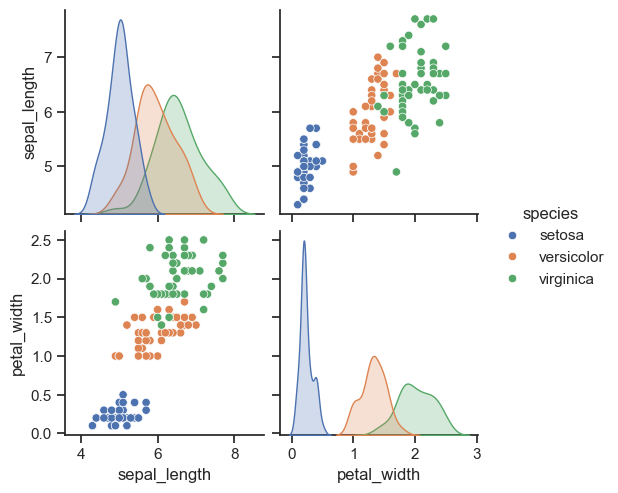

In [116]:
sns.set_theme(style="ticks")
sns.pairplot(data_without_outliers[top_features + ["species"]], hue="species")

#### v. Feature Ranking Explanation

A. From the top two features I selected using the fischer score, the petal_width does the best job at separating the data set. The combination of the top two features also does a great job at separating the dataset.

B. From previous analysis in part 1, the sepal_width did the worst at separating the species indicating that this feature has commonality across species. This commonality makes it difficult to disocciate between them.

C. A good metric to separate the features would be to use the expecation maximization algorithm that we learned in module 6. This could help associate rows of data with there respective species. 

### Part F

#### i. PCA

<Axes: >

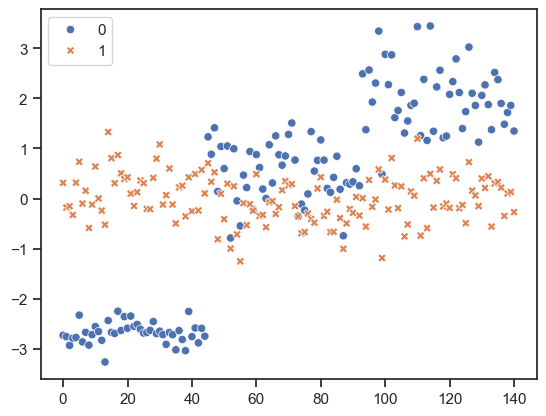

In [118]:
from sklearn.decomposition import PCA

decompose = PCA(n_components=2)
pca_data = decompose.fit_transform(X=data_without_outliers[features])
sns.scatterplot(pca_data)

In [123]:
species_pca = {}
for i in data_without_outliers["species"].unique():
    data = data_without_outliers.loc[data_without_outliers["species"]==i,:]
    iter_pca = PCA(n_components=2)
    pca_data = iter_pca.fit_transform(data[features])
    species_pca[i] = [iter_pca, pca_data]

In [124]:
species_pca

{'setosa': [PCA(n_components=2),
  array([[ 0.10085579, -0.01738721],
         [-0.39402331,  0.19023361],
         [-0.39809631, -0.1096691 ],
         [-0.51356674, -0.04393235],
         [ 0.10487008, -0.15137825],
         [ 0.64711828,  0.00789267],
         [-0.30059001, -0.27810891],
         [-0.02671623,  0.01642892],
         [-0.80501556, -0.07206198],
         [-0.31962422,  0.15263708],
         [ 0.46013427,  0.07679019],
         [-0.15027396, -0.083746  ],
         [-0.47139943,  0.12261195],
         [-0.8468525 , -0.30338879],
         [ 1.18562385, -0.19752162],
         [ 0.59871191, -0.11978983],
         [ 0.11040225, -0.01581332],
         [ 0.76921685,  0.27240538],
         [ 0.3380357 , -0.18772251],
         [ 0.26880559,  0.34446126],
         [ 0.27573821, -0.11820535],
         [ 0.02211204,  0.21898288],
         [-0.30199046,  0.32012264],
         [ 0.00447828,  0.05149732],
         [ 0.18078704,  0.08058119],
         [ 0.09684149,  0.11660384],
     

In [125]:
species_pca["setosa"][0].explained_variance_ratio_

array([0.79350503, 0.11232687])

In [126]:
species_pca["versicolor"][0].explained_variance_ratio_

array([0.78164496, 0.12365009])

In [127]:
species_pca["virginica"][0].explained_variance_ratio_

array([0.76980159, 0.13380574])

In [128]:
decompose.explained_variance_ratio_

array([0.92660082, 0.05065902])